<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Análise dos Dados do Airbnb - Amsterdã**
*by [Carol Bastos](https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile)*


---

<center><h1>AMSTERDAM</h1></center>


<center>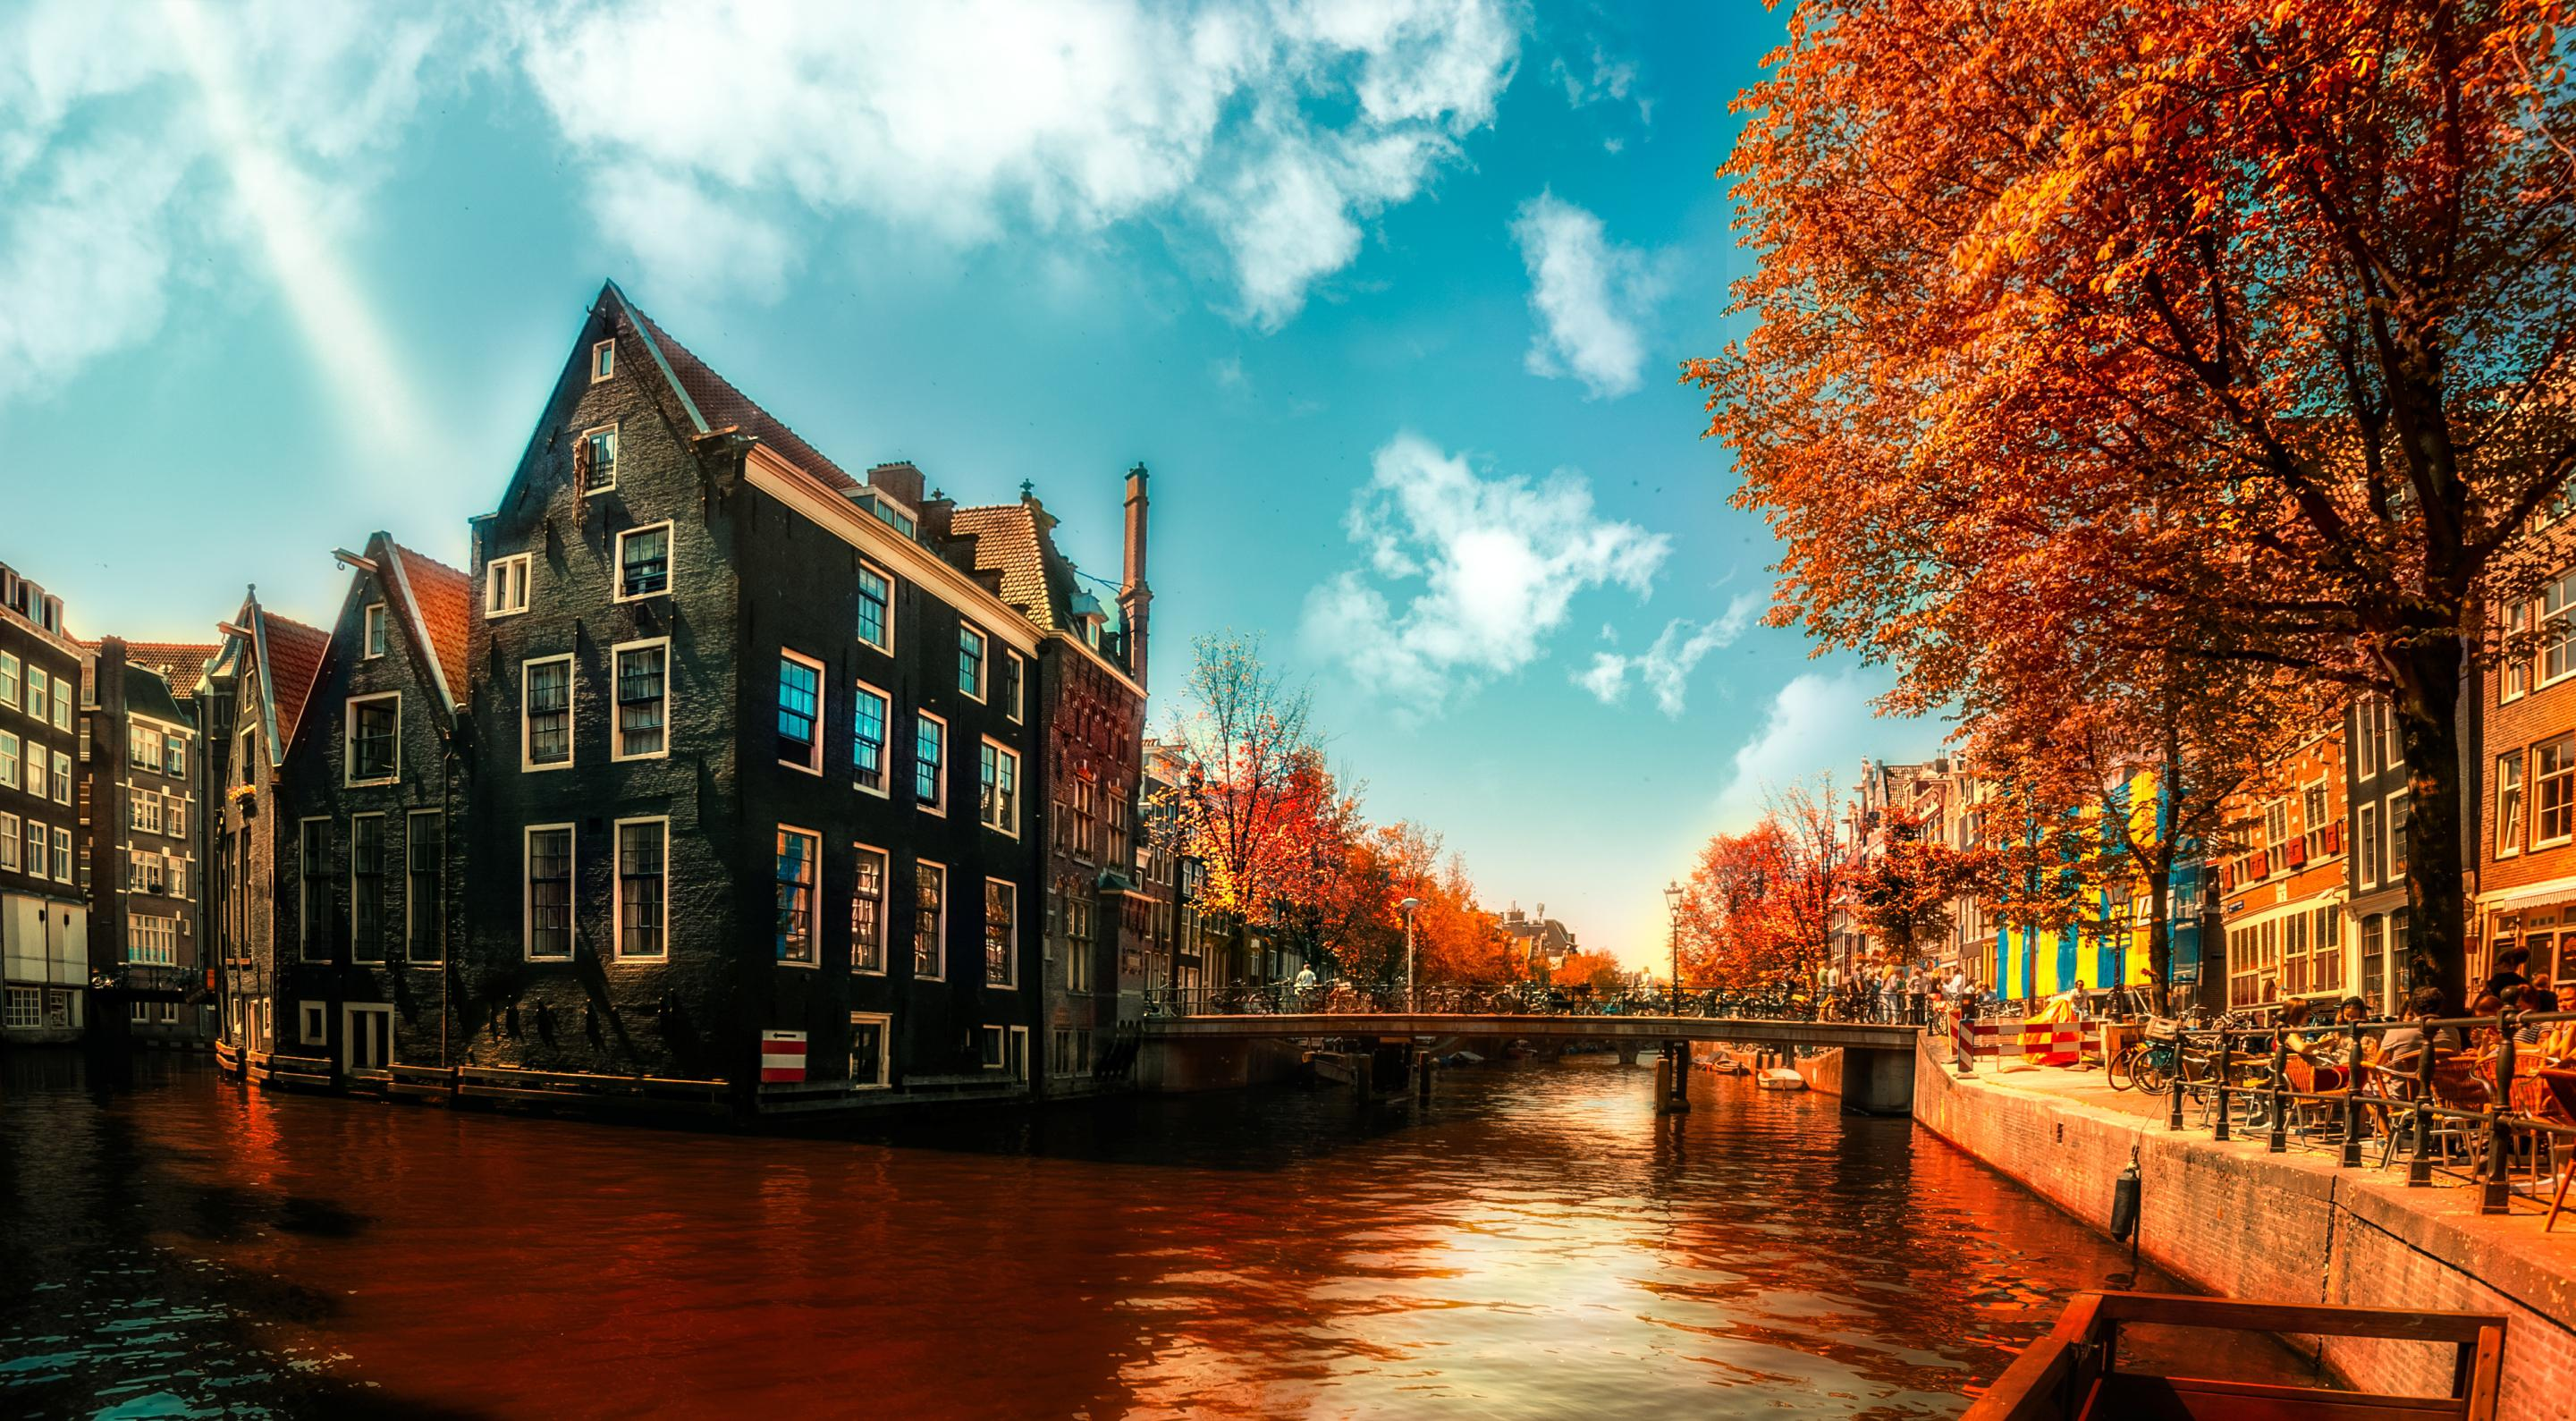</center><p>

No século XII, a construção de um dique (dam) sobre o rio Amstel deu nome ao povoado aí assentado: *`Amsteldam`*. Amsterdam, como é chamada hoje no Brasil, teve papel fundamental em diversos acontecimentos históricos, políticos, econômicos e culturais  ao longo dos séculos. Entre diversos outros acontecimentos e feitos, podemos ressaltar que Amsterdam foi destaque como centro comercial no norte da Europa, foi o segundo maior porto do mundo e foi a capital dos Países Baixos.

Apesar de ter perdido força política para Haia (atual capital dos Países Baixos), Amsterdam segue sendo seu centro intelectual, uma cidade industrial (talha de diamantes) e de serviços (Aeroporto de Schiphol), de caráter multirracial, com uma grande porcentagem de imigrantes e símbolo universal de tolerância e liberdade.

Tudo isso faz de Amsterdam um destino procurado por turistas de todas as idades, todas as culturas e todas as partes do mundo. Porém, o preço médio dos hotéis não pode ser considerado econômico e a qualidade dos hotéis não é como a de outros países europeus. Assim, os aluguéis de apartamentos se tornaram uma alternativa aos hotéis e cada vez contam com mais aceitação. 

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. 
<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Buscando trazer para nossos leitores informações sobre melhores lugares, valores e condições de aluguel de imóveis por temporada em Amsterdam, através do Airbnb, buscamos do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) dados atuais de hospedagens na cidade.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [289]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [290]:
# importar o arquivo listings.csv para um DataFrame
dados_df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-06-08/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

- **`id`** --> número de id gerado para identificar a transação
- **`name`** --> nome do imóvel
- **`host_id`** --> número de id do host
- **`host_name`** --> nome do host
- **`neighbourhood_group`** --> coluna sem valores válidos
- **`neighbourhood`** --> nome do bairro
- **`latitude`** --> coordenada de latitude da propriedade
- **`longitude`** --> coordenada de longitude da propriedade
- **`room_type`** --> tipo de apartamento oferecido
- **`price`** --> preço por noite
- **`minumum_nights`** --> mínimo de noites que podem ser reservadas
- **`number_of_reviews`** --> número de reviews que a propriedade tem
- **`last_review`** --> data em ingês e abreviado AAAA-MM-DD que foi feito o último review
- **`review_per_month`** --> número de reviews por mês
- **`calculated_host_listings_count`** --> número de propriedades do host
- **`availability_365`** --> número de dias disponíveis em 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [291]:
# mostrar as 5 primeiras entradas
dados_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.04,1,158
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.44,1,17
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.72,2,31
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.17,1,212
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,217,2020-03-02,2.12,1,235


---

**Após realizarmos a busca pelo banco de dados mais atual relacionado a ***`Amsterdam`*** no ***`Airbnb`***, chegou a hora de *`entender como estão estruturados para poder interpretá-los.`***

---

In [292]:
# identificar o volume de dados do DataFrame
print(f'Nosso banco de dados possui {dados_df.shape[0]} entradas, distribuídas em {dados_df.shape[1]} variáveis.\n')

# verificar as 5 primeiras entradas do dataset
print('Os tipos dessas vairáveis estão descritas abaixo.\n')
display(dados_df.dtypes)

Nosso banco de dados possui 19352 entradas, distribuídas em 16 variáveis.

Os tipos dessas vairáveis estão descritas abaixo.



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---
**Após um breve detalhamento dos dados (mostrado abaixo em percentual), podemos verificar que:**

- **`100,00 %`** dos dados de `neighbourhood_group` estão faltando;
- **`12,36 %`** dos dados de `reviews_per_month` e `last_review` também estão faltando;
- **`0,17 %`** dos dados de `name` estão faltando;
- **`0,05 %`** dos dados de `host_name` estão faltando.

***Todas as demais variáveis estão preenchidas o que nos dá uma gama imensa de possibilidades para análises.***

---


In [293]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
variaveis_vazias = dados_df.isnull().sum()
variaveis_totais = dados_df.shape[0]
((variaveis_vazias/variaveis_totais)*100).sort_values(ascending = False)

neighbourhood_group               100.000000
reviews_per_month                  12.360480
last_review                        12.360480
name                                0.170525
host_name                           0.056842
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

---

**Para entendermos melhor a distribuição das variáveis, vamos plotar os histogramas abaixo.**

---

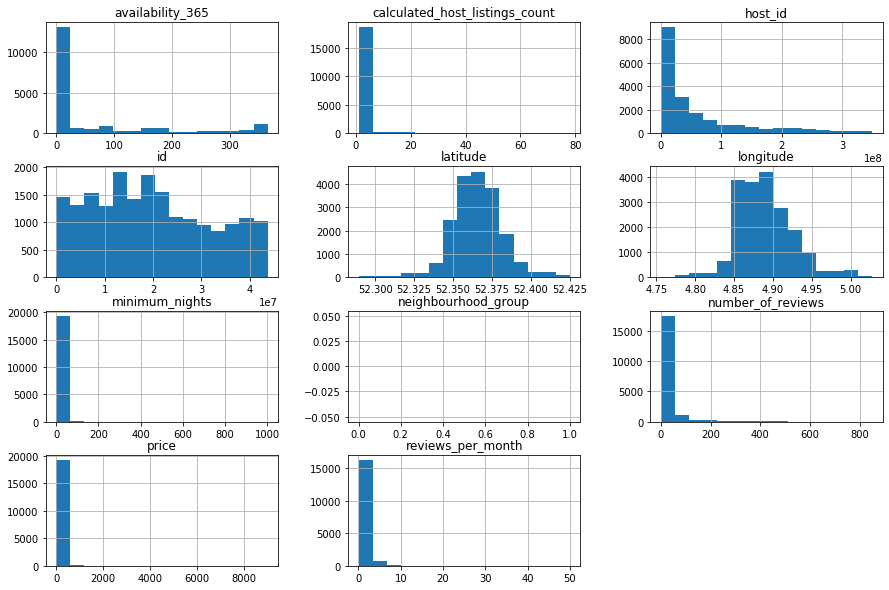

In [294]:
# plotar o histograma das variáveis numéricas
dados_df.hist(bins=15, figsize=(15,10));

---

**Pela distribuição dos histogramas, é possível verificar indícios da presença de *outliers*.**

Os valores não seguem uma distribuição, e distorcem não só a nossa representação gráfica, como também, a interpretção dos dados.
Para confirmar a presença de *outliers* podemos fazer:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

---

In [295]:
dados_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19352.000000,19352.000000,19352.000000,16960.000000,19352.000000,19352.000000
mean,165.933340,3.509663,24.924607,0.744867,2.173729,61.542115
std,236.859423,13.551495,53.892550,1.216225,6.147742,108.154091
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000,2.000000,0.170000,1.000000,0.000000
50%,130.000000,2.000000,9.000000,0.380000,1.000000,0.000000
75%,188.000000,3.000000,23.000000,0.770000,1.000000,87.000000
max,9000.000000,1001.000000,850.000000,50.000000,78.000000,365.000000


Olhando os dados acima podemos observar que para todas as categorias o *`valor do desvio padrão é maior que a média`*, o que nos indica que os valores estão variando muito.cEssa hipótese pode ser confirmada quando olhamos os valores mínimos e máximos.\
\
Para continuar a nossa investigação dos dados de modo a identificar e excluir os *outliers* podemos plotar *`boxplots`* das variáveis que nos interessam nesse momento:

- price
- minimum_nights



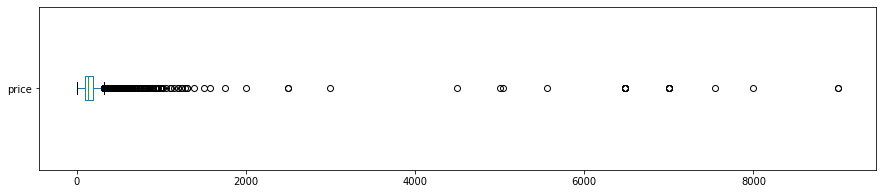


valores acima de 180 :
4985 entradas ___ 25.76%

valores acima de 190 :
4631 entradas ___ 23.93%

valores acima de 200 :
3506 entradas ___ 18.12%

valores acima de 210 :
3368 entradas ___ 17.40%

valores acima de 220 :
3115 entradas ___ 16.10%

valores acima de 230 :
2796 entradas ___ 14.45%

valores acima de 240 :
2643 entradas ___ 13.66%

valores acima de 250 :
1982 entradas ___ 10.24%

valores acima de 260 :
1910 entradas ___ 9.87%

valores acima de 270 :
1841 entradas ___ 9.51%

valores acima de 280 :
1630 entradas ___ 8.42%

valores acima de 290 :
1568 entradas ___ 8.10%



In [296]:
# price
dados_df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print()

# ver quantidade de valores acima de 180 a 300 reais para diária
for i in range(180,300,10):
    print("valores acima de",i,":")
    print(f"{(len(dados_df[dados_df.price > i]))} entradas ___ {((len(dados_df[dados_df.price > i]) / dados_df.shape[0])*100):.2f}%")
    print()


**No gráfico acima podemos observar como a distribuição dos dados é heterogêna, porém, com maior concentração abaixo do valor médio (aproximadamente, *`68%`*).**

---

**Para o número de diárias, teremos também uma distribuição dos dados bastante heterogênia com uma concentração de aproximadamente *`80%`* abaixo da média.**

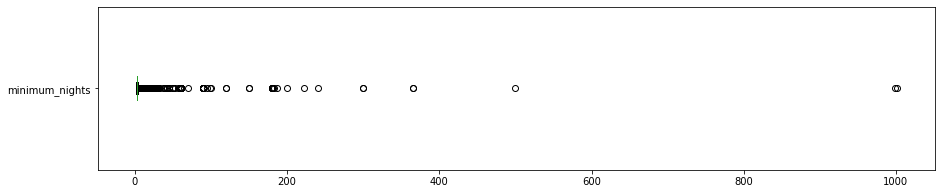


valores acima de 2 :
8736 entradas ___ 45.1426%

valores acima de 3 :
3964 entradas ___ 20.4837%

valores acima de 4 :
2383 entradas ___ 12.3140%

valores acima de 5 :
1369 entradas ___ 7.0742%



In [297]:
# minimum_nights
dados_df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print()
# ver quantidade de valores acima de 5 dias para minimum_nights
for d in range(2,6):
    print("valores acima de",d,":")
    print("{} entradas".format(len(dados_df[dados_df.minimum_nights > d])),"___","{:.4f}%".format((len(dados_df[dados_df.minimum_nights > d]) / dados_df.shape[0])*100))
    print()

---

Devido ao exposto acima é interessante para nossa análise remover esses *outliers* e plotar novamente os histogramas.

---

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,15334.000000,15334.000000,15334.000000,13775.000000,15334.000000
mean,132.751206,2.280944,27.251076,0.789261,54.422851
std,50.969617,0.867754,58.126002,1.164079,101.758952
min,5.000000,1.000000,0.000000,0.010000,0.000000
25%,95.000000,2.000000,3.000000,0.180000,0.000000
50%,125.000000,2.000000,9.000000,0.400000,0.000000
75%,165.000000,3.000000,25.000000,0.800000,67.000000
max,260.000000,4.000000,850.000000,11.290000,365.000000


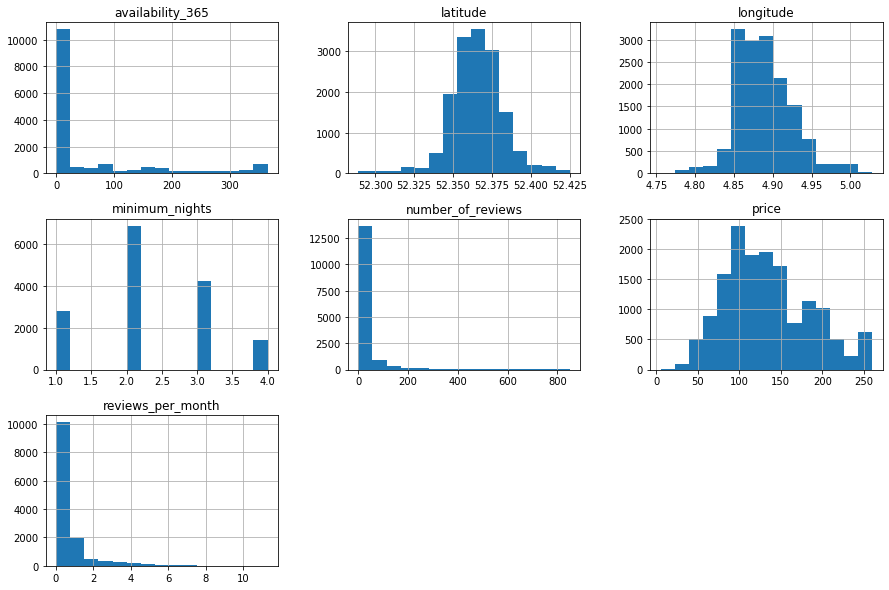

In [298]:

# remover os *outliers* em um novo DataFrame
dados_df_clean = dados_df.copy()
dados_df_clean.drop(dados_df_clean[dados_df_clean.price > 260].index, axis=0, inplace=True)
dados_df_clean.drop(dados_df_clean[dados_df_clean.minimum_nights > 4].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
dados_df_clean.drop('neighbourhood_group', axis=1, inplace=True)
dados_df_clean.drop('calculated_host_listings_count', axis=1, inplace=True)
dados_df_clean.drop('id', axis=1, inplace=True)
dados_df_clean.drop('host_id', axis=1, inplace=True)


# plotar o histograma para as variáveis numéricas
dados_df_clean.hist(bins=15, figsize=(15,10));

# obtendo a descrição dos dados com o .describe()
dados_df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()


Com esse novo plot podemos observar melhor o comportamento das variáveis.

---



**Quando analisamos a coluna de valores (`price`), temos que a média geral de Amsterdam é de:**

In [324]:
# ver a média da coluna `price`
print(f'Média geral: {dados_df_clean.price.mean():.2f}')

print('Porém, podemos ainda analisar a média por bairro, onde teremos que o bairro Centrum encabeçando a lista dos mais caros.')


Média geral: 132.75
Porém, podemos ainda analisar a média por bairro, onde teremos que o bairro Centrum encabeçando a lista dos mais caros.


In [378]:
# ver preços por bairros, na média
print(f'Os 15 bairros mais caros são: {round(dados_df_clean.groupby(["neighbourhood"]).price.mean(),2).sort_values(ascending = False)[0:15]}.');


Os 15 bairros mais caros são: neighbourhood
Centrum-West                              149.02
Centrum-Oost                              147.73
De Pijp - Rivierenbuurt                   140.64
Zuid                                      137.53
Oud-Oost                                  134.66
Westerpark                                133.65
De Baarsjes - Oud-West                    133.48
IJburg - Zeeburgereiland                  132.57
Oud-Noord                                 124.65
Noord-Oost                                124.55
Buitenveldert - Zuidas                    124.45
Watergraafsmeer                           123.46
Oostelijk Havengebied - Indische Buurt    122.39
Noord-West                                119.84
Bos en Lommer                             117.30
Name: price, dtype: float64.


---

Podemos perceber pelo gráfico abaixo que os imóvies mais distantes (em azul) são os mais baratos, enquanto os imóveis concentrados por volta da mesma latitude tendem a ser mais caros. Isso sugere que existe um diferenciação de valores devido às regiões como viamos acima.

---

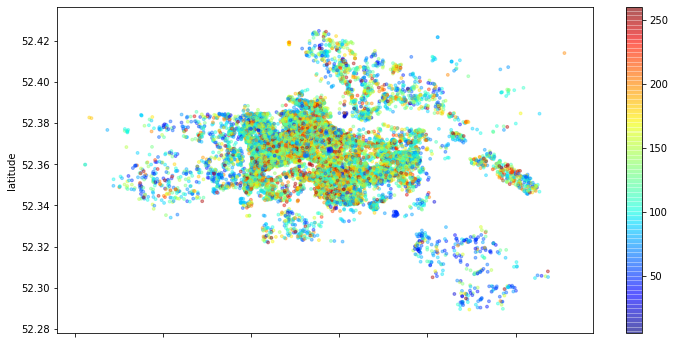

In [393]:
# plotar os imóveis pela latitude-longitude
dados_df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dados_df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,6));

---

**A correlação é a relação existente entre as variáveis. Quanto maior o valor de $r$ (positivo ou negativo), mais forte a associação.**

Podemos ver abaixo que a correlação entre as variáveis é, em sua maioria, fraca ou bem fraca, não sendo maior que $+$ ou $-$ 0.39, salvo a correlação entre `number_of_reviews` e `reviews_per_month`.


In [379]:
# criar uma matriz de correlação
correlacao = dados_df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()


# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.142213,-0.133772,-0.161583,0.056748
minimum_nights,0.142213,1.000000,-0.070119,-0.172975,-0.111350
number_of_reviews,-0.133772,-0.070119,1.000000,0.827675,0.338608
reviews_per_month,-0.161583,-0.172975,0.827675,1.000000,0.398336
availability_365,0.056748,-0.111350,0.338608,0.398336,1.000000


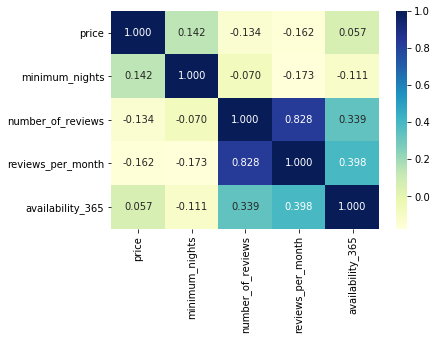

In [380]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='YlGnBu', fmt='.3f', square=False, linecolor='white', annot=True);

---

**Dentre os tipos de imóveis  disponíeis para aluguel, temos:**

In [381]:
# mostrar a quantidade de cada tipo de imóvel disponível
dados_df_clean.room_type.value_counts()


Entire home/apt    11510
Private room        3594
Hotel room           186
Shared room           44
Name: room_type, dtype: int64

In [382]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(dados_df_clean.room_type.value_counts()/dados_df_clean.shape[0]*100)

Entire home/apt    75.061954
Private room       23.438111
Hotel room          1.212991
Shared room         0.286944
Name: room_type, dtype: float64


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em praticamente todas as variáveis. 

Notamos também que não há uma correlação forte entre as variáveis estudadas neste dataset.

Sugere-se um estudo mais aprofundado e com os dados completos disponíveis no site do Airbnb para análises mais profundas.